## Use the Glass dataset and apply the Random forest model.

In [162]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [223]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import BaggingClassifier


In [166]:
df=pd.read_excel('glass.xlsx')

In [168]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## 1. Exploratory Data Analysis (EDA):

In [171]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [173]:
## Check for missing values
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [175]:
# Outlier check

df.boxplot()

<Axes: >

In [177]:
# Outlier Removal

def outlier_removal(df,columns):
    thereshold=2
    z_score=stats.zscore(df[columns])
    return df[(abs(z_score)<thereshold).all(axis=1)]

In [179]:
cleaned_df = outlier_removal(df,columns=df.columns)

In [181]:
cleaned_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [183]:
cleaned_df.shape

(155, 10)

In [185]:
df.shape

(214, 10)

In [187]:
target=cleaned_df[['Type']]
features=cleaned_df.drop(columns='Type')

In [189]:
print(target.shape)
print(features.shape)

(155, 1)
(155, 9)


## 2: Data Visualization:

In [192]:
# Separate numerical and categorical columns
numerical_features = features.select_dtypes(include=['number']).columns
categorical_features = features.select_dtypes(include=['object', 'category']).columns

In [194]:
print(numerical_features)
print(categorical_features)   # This means all my features columns are numerical columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')
Index([], dtype='object')


In [196]:
plt.hist(features, bins=10)

(array([[155.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0., 153.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [155.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [155.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 155.],
        [155.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  2., 153.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [155.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [155.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([ 0.   ,  7.388, 14.776, 22.164, 29.552, 36.94 , 44.328, 51.716,
        59.104, 66.492, 73.88 ]),
 <a list of 9 BarContainer objects>)

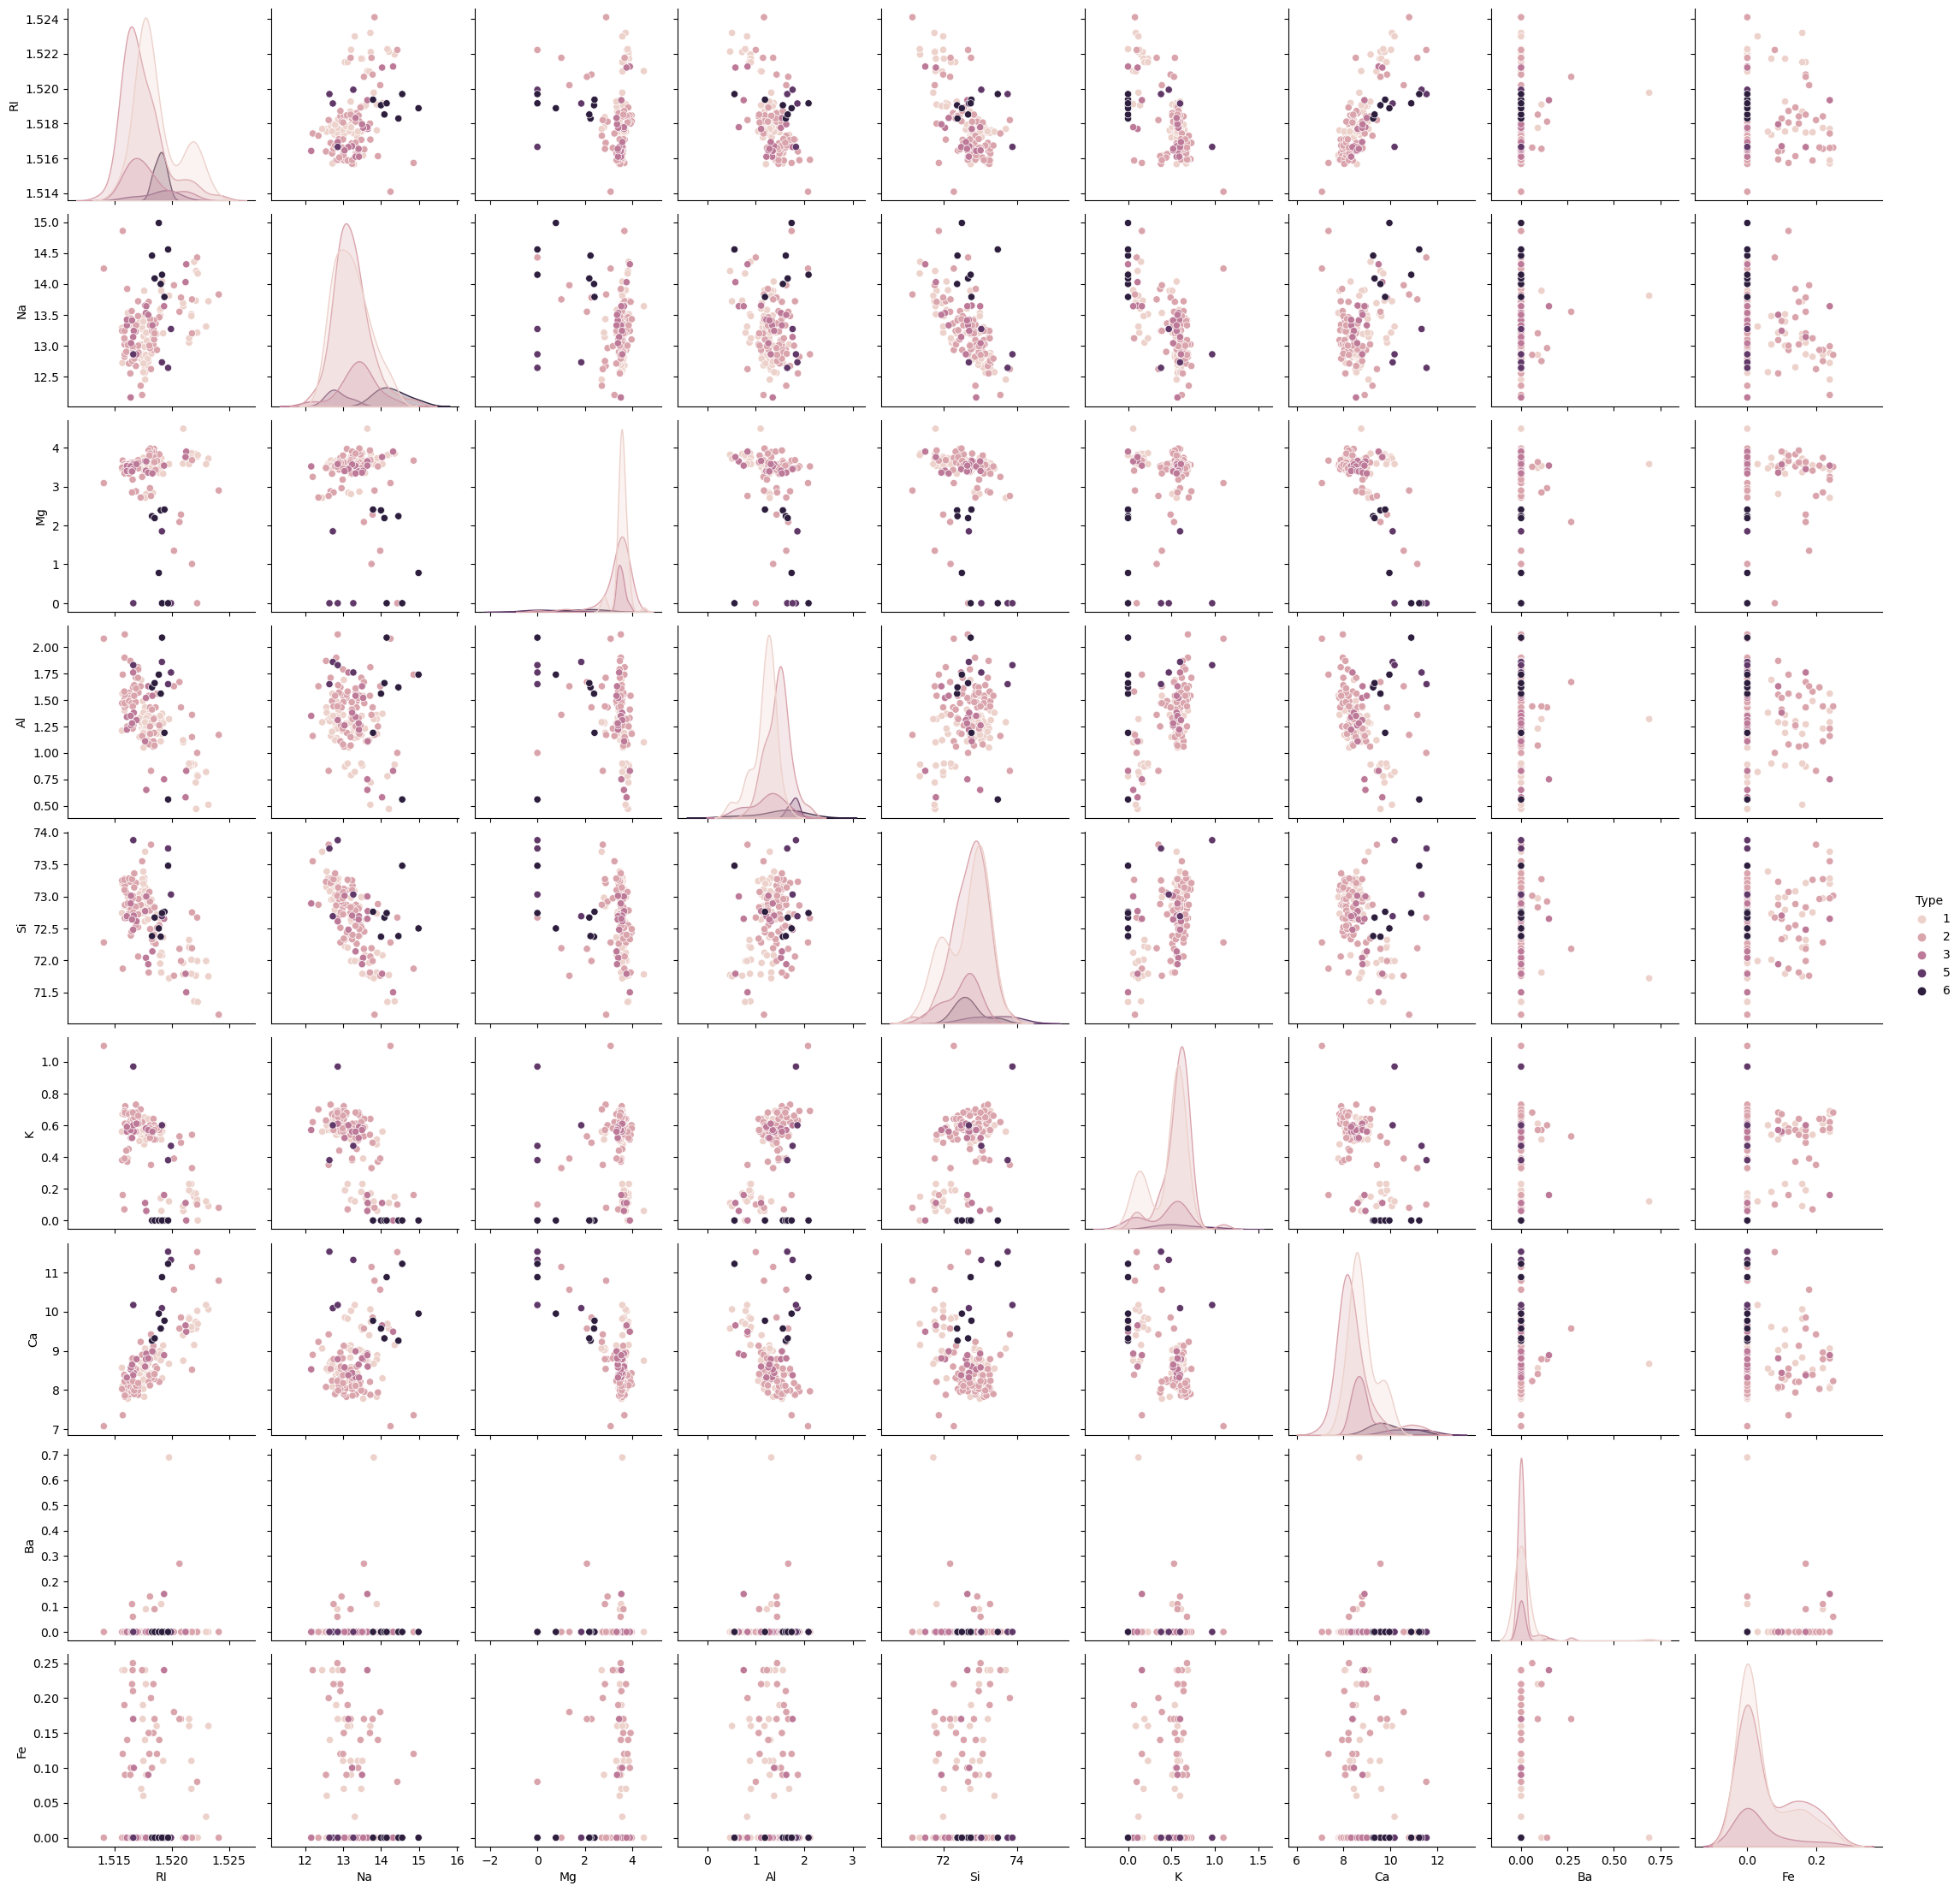

In [213]:
# Pairplot to visualize relationships
sns.pairplot(cleaned_df,hue='Type')
plt.show()

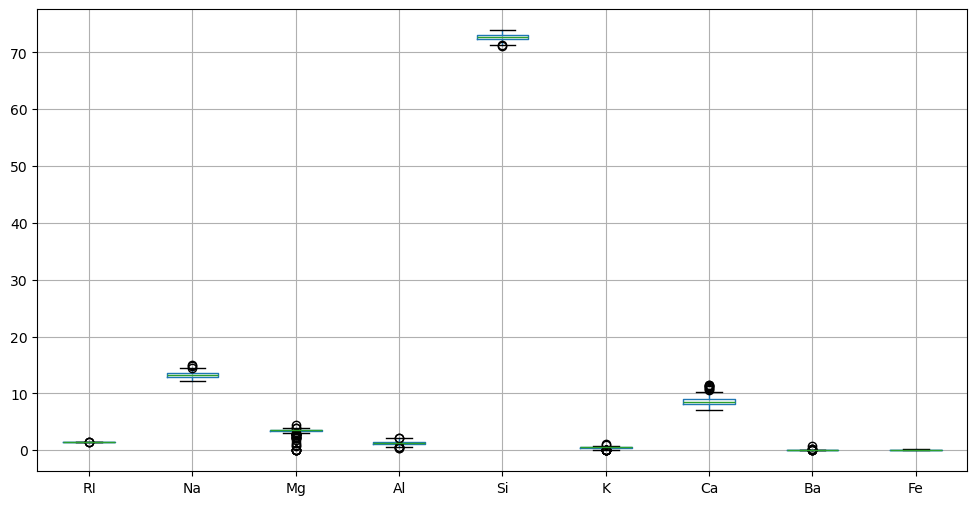

In [199]:
features.boxplot(figsize=(12,6))
plt.show()

## 3: Data Preprocessing

In [201]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [202]:
scaled_features

array([[ 1.51830739,  0.70502325,  1.46082655, ..., -0.01664676,
        -0.1749674 , -0.62013838],
       [-0.27301524,  1.194535  ,  0.38311639, ..., -1.14704088,
        -0.1749674 , -0.62013838],
       [-1.02642447,  0.48963808,  0.32257088, ..., -1.20847534,
        -0.1749674 , -0.62013838],
       ...,
       [ 0.39609645,  3.3483867 , -3.03165062, ...,  1.45778035,
        -0.1749674 , -0.62013838],
       [ 0.54361713,  1.70362722, -3.97616064, ...,  2.60046137,
        -0.1749674 , -0.62013838],
       [ 0.82285272,  2.50642649, -3.97616064, ...,  3.01821572,
        -0.1749674 , -0.62013838]])

In [203]:
# Split the data

X_train, X_test, Y_train, Y_test = train_test_split(scaled_features,target, test_size=0.3, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (108, 9)
Test shape: (47, 9)


In [204]:
# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Make predictions
Y_pred = rf_model.predict(X_test)


C:\Users\HP\AppData\Local\Temp\ipykernel_12628\2979640161.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, Y_train)


In [205]:
# Accuracy score
print("Accuracy:", accuracy_score(Y_test, Y_pred))


Accuracy: 0.7021276595744681


## 5: Bagging and Boosting Methods

In [207]:
bagging_model = BaggingClassifier(base_estimator=rf_model, n_estimators=10, random_state=42)
bagging_model.fit(X_train, Y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42),
                  random_state=42)

In [208]:
Y_pred_bagging = bagging_model.predict(X_test)

In [209]:
print("Bagging Accuracy:", accuracy_score(Y_test, Y_pred_bagging))

Bagging Accuracy: 0.6595744680851063


In [215]:
# Boosting

import lightgbm as lgb

In [217]:
light_gbm = lgb.LGBMClassifier(n_estimators=100,learning_rate=0.5,min_child_weight=2,reg_alpha=10,reg_lamda=10,subsample=0.9,max_features=0.9,
                            boosting_type='goss',top_rate=0.2,other_rate=0.3,min_bins=20)

In [219]:
light_gbm.fit(X_train,Y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Unknown parameter: min_bins
[LightGBM] [Warning] Unknown parameter: reg_lamda
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Unknown parameter: min_bins
[LightGBM] [Warning] Unknown parameter: reg_lamda
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] 

LGBMClassifier(boosting_type='goss', learning_rate=0.5, max_features=0.9,
               min_bins=20, min_child_weight=2, other_rate=0.3, reg_alpha=10,
               reg_lamda=10, subsample=0.9, top_rate=0.2)

In [229]:
Y_pred_boosting=light_gbm.predict(X_test)
Y_pred_boosting

[LightGBM] [Warning] Unknown parameter: min_bins
[LightGBM] [Warning] Unknown parameter: reg_lamda
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


array([2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 2], dtype=int64)

In [231]:
accuracy_score(Y_pred_boosting,Y_test)

0.574468085106383

## 1. Explain Bagging and Boosting methods. How is it different from each other.


In [ ]:
# Baggins trains the model parallaly where as boosting trains the model sequencially . 
# Bagging use to overcome overfit problem where as boosting use to overcome underfit problem
#

## 2. Explain how to handle imbalance in the data.

In [ ]:
# We can handle imbalance data by using following method--
 # SMOTE (Synthetic Minority Over-sampling Technique)
 # Random Over Sampling
 # Random under Sampling